In [1]:
import numpy as np
import pandas as pd

In [3]:
# Load Python libraries
from sklearn.model_selection import cross_validate,GridSearchCV
#from sklearn import cross_validation, grid_search, metrics, svm
from sklearn import metrics, ensemble
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('file:///C:/Users/suhas/OneDrive/Desktop/digitalmarketingandanalytics/Final Project/Namrata Rathore/train.csv')
df = df.sample(frac=0.0001)

In [5]:
#using songs and members dataset
songs = pd.read_csv('file:///C:/Users/suhas/OneDrive/Desktop/digitalmarketingandanalytics/Final Project/Namrata Rathore/songs.csv')
df = pd.merge(df, songs, on='song_id', how='left')
del songs

# Load and join songs data
members = pd.read_csv('file:///C:/Users/suhas/OneDrive/Desktop/digitalmarketingandanalytics/Final Project/Namrata Rathore/members.csv')
df = pd.merge(df, members, on='msno', how='left')
del members

In [6]:
#removing null values
df.isnull().sum()/df.isnull().count()*100

msno                       0.000000
song_id                    0.000000
source_system_tab          0.000000
source_screen_name         5.420054
source_type                0.135501
target                     0.000000
song_length                0.000000
genre_ids                  1.626016
artist_name                0.000000
composer                  24.525745
lyricist                  46.476965
language                   0.000000
city                       0.000000
bd                         0.000000
gender                    39.837398
registered_via             0.000000
registration_init_time     0.000000
expiration_date            0.000000
dtype: float64

In [7]:
#removing Nan values
for i in df.select_dtypes(include=['object']).columns:
    df[i][df[i].isnull()] = 'unknown'
df = df.fillna(value=0)

In [8]:
# creating a column of registration_init_date  using month, year and day
df.registration_init_time = pd.to_datetime(df.registration_init_time, format='%Y%m%d', errors='ignore')
df['registration_init_time_year'] = df['registration_init_time'].dt.year
df['registration_init_time_month'] = df['registration_init_time'].dt.month
df['registration_init_time_day'] = df['registration_init_time'].dt.day

# creating expiration date using year, date, month

df.expiration_date = pd.to_datetime(df.expiration_date,  format='%Y%m%d', errors='ignore')
df['expiration_date_year'] = df['expiration_date'].dt.year
df['expiration_date_month'] = df['expiration_date'].dt.month
df['expiration_date_day'] = df['expiration_date'].dt.day

In [9]:
# conversion into categorical values
df['registration_init_time'] = df['registration_init_time'].astype('category')
df['expiration_date'] = df['expiration_date'].astype('category')

In [10]:
# converting into categorcial values
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].astype('category')
    
    
# encoding of categorical values
for col in df.select_dtypes(include=['category']).columns:
    df[col] = df[col].cat.codes
    
# Drop columns
df = df.drop(['expiration_date', 'lyricist'], 1)

In [11]:
#implementing PCA

import numpy as np
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(df[df.columns[df.columns != 'target']])

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [13]:
# Model with the best estimator
from sklearn import svm
model = svm.SVC()
model.fit(df[df.columns[df.columns != 'target']], df.target)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [14]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=3)

model = svm.SVC()
for train_indices,val_indices in kf.split(df) :
    model.fit(df.drop(['target'],axis=1).loc[train_indices,:],df.loc[train_indices,'target'])

In [15]:
X_array=df['target'].values

In [16]:
model.score(df[df.columns[df.columns != 'target']], df.target)

0.8482384823848238

In [18]:
df_test=pd.read_csv('file:///C:/Users/suhas/OneDrive/Desktop/digitalmarketingandanalytics/Final Project/Namrata Rathore/test.csv')

songs = pd.read_csv('file:///C:/Users/suhas/OneDrive/Desktop/digitalmarketingandanalytics/Final Project/Namrata Rathore/songs.csv')
df_test = pd.merge(df_test, songs, on='song_id', how='left')
del songs

# Load and join songs data
members = pd.read_csv('file:///C:/Users/suhas/OneDrive/Desktop/digitalmarketingandanalytics/Final Project/Namrata Rathore/members.csv')
df_test = pd.merge(df_test, members, on='msno', how='left')
del members

df_test.isnull().sum()/df_test.isnull().count()*100

#replace NA
for i in df_test.select_dtypes(include=['object']).columns:
    df_test[i][df_test[i].isnull()] = 'unknown'
df_test = df_test.fillna(value=0)

df_test.registration_init_time = pd.to_datetime(df_test.registration_init_time, format='%Y%m%d', errors='ignore')
df_test['registration_init_time_year'] = df_test['registration_init_time'].dt.year
df_test['registration_init_time_month'] = df_test['registration_init_time'].dt.month
df_test['registration_init_time_day'] = df_test['registration_init_time'].dt.day

# expiration_date
df_test.expiration_date = pd.to_datetime(df_test.expiration_date,  format='%Y%m%d', errors='ignore')
df_test['expiration_date_year'] = df_test['expiration_date'].dt.year
df_test['expiration_date_month'] = df_test['expiration_date'].dt.month
df_test['expiration_date_day'] = df_test['expiration_date'].dt.day

df_test['registration_init_time'] = df_test['registration_init_time'].astype('category')
df_test['expiration_date'] = df_test['expiration_date'].astype('category')

# Object data to category
for col in df_test.select_dtypes(include=['object']).columns:
    df_test[col] = df_test[col].astype('category')
    
# Encoding categorical features
for col in df_test.select_dtypes(include=['category']).columns:
    df_test[col] = df_test[col].cat.codes

In [19]:
df_test = df_test.drop(['expiration_date', 'lyricist'], 1)

In [20]:
predictions=np.zeros(shape=[len(df_test)])
predictions+=model.predict(df_test.drop(['id'],axis=1))

In [21]:
predictions = predictions/3

submission = pd.read_csv('file:///C:/Users/suhas/OneDrive/Desktop/digitalmarketingandanalytics/Final Project/Namrata Rathore/sample_submission.csv')

submission.target=predictions
submission.to_csv('svm.csv',index=False)

In [22]:
length=df['target'].count()
split=0.3
test=df[int(length*(1-split)):length]
df=df[0:int(length*(1-split))]

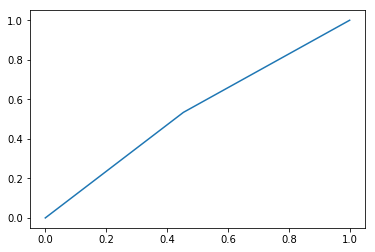

In [23]:
from random import randint
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
X_test = test.drop(['target'], axis=1)
predictions_roc = model.predict(X_test)
x=[randint(0,1) for p in range(0,222)]
fpr, tpr, thresholds = roc_curve(test['target'], x)
roc_auc = auc(fpr, tpr)
roc_auc
plt.plot(fpr,tpr)

In [24]:

plt.show()

In [25]:
roc_auc

0.5400995349596149

In [26]:
X_array=df['target'].values

In [27]:

from sklearn.metrics import classification_report
target_names=['class 0','class1']
print(classification_report(X_array,predictions_roc,target_names=target_names))

ValueError: Found input variables with inconsistent numbers of samples: [516, 222]